In [7]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [8]:
# Download stock data from Yahoo Finance
symbol = 'SPY'  # You can replace this with any stock ticker
data = yf.download(symbol, start='2020-01-01', end='2024-01-01')

[*********************100%***********************]  1 of 1 completed


In [9]:
# Calculate moving averages
data['50MA'] = data['Close'].rolling(window=50).mean()
data['200MA'] = data['Close'].rolling(window=200).mean()

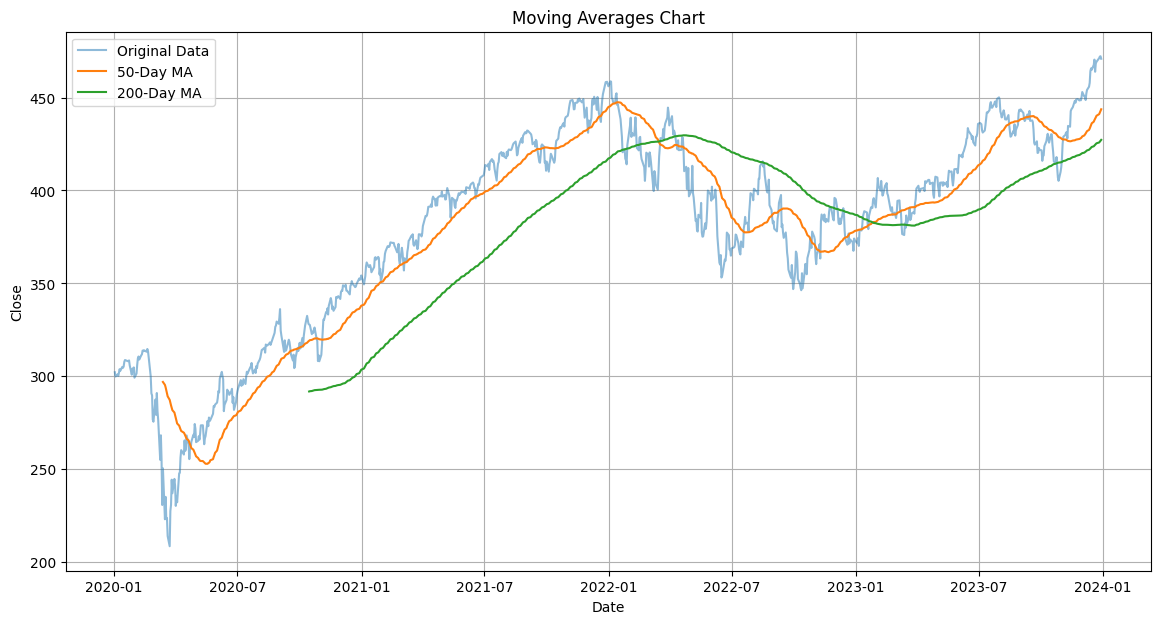

In [ ]:
# Plot the chart
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Original Data', alpha=0.5)
plt.plot(data.index, data['50MA'], label='50-Day MA')
plt.plot(data.index, data['200MA'], label='200-Day MA')
plt.title(symbol)
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.grid(True)
plt.show()